In [38]:
import pandas as pd
import numpy as np
from datetime import timedelta
from pandas.plotting import register_matplotlib_converters
from matplotlib import pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from time import time
from datetime import datetime
register_matplotlib_converters()

# Ice Cream Production Data

In [14]:
def parser(s):
    return datetime.strptime(s,'%Y-%m-%d')

In [24]:
production_ice_cream = pd.read_csv('ice_cream.csv', parse_dates=[0], index_col=0,date_parser=parser).squeeze("columns")

/var/folders/c4/r352rgd11976t2t3272jf1q00000gn/T/ipykernel_14681/2486074536.py:1: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  production_ice_cream = pd.read_csv('ice_cream.csv', parse_dates=[0], index_col=0,date_parser=parser).squeeze("columns")


In [25]:
production_ice_cream.rename('production', inplace=True)

DATE
1972-01-01     59.9622
1972-02-01     67.0605
1972-03-01     74.2350
1972-04-01     78.1120
1972-05-01     84.7636
                ...   
2019-09-01    100.1741
2019-10-01     90.1684
2019-11-01     79.7223
2019-12-01     75.7094
2020-01-01     83.6290
Name: production, Length: 577, dtype: float64

In [26]:
production_ice_cream = production_ice_cream.asfreq(pd.infer_freq(production_ice_cream.index))

In [27]:
start_date = pd.to_datetime('2010-01-01')
production_ice_cream = production_ice_cream[start_date:]

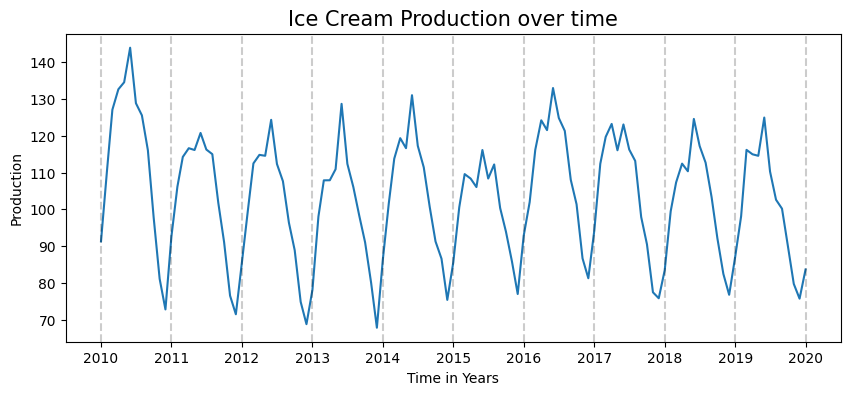

In [34]:
plt.figure(figsize= (10,4))
plt.plot(production_ice_cream)
plt.title("Ice Cream Production over time", fontsize = 15)
plt.ylabel('Production', fontsize = 10)
plt.xlabel('Time in Years', fontsize = 10)
for year in range(2010,2021):
    plt.axvline(pd.to_datetime(str(year)+ '-01-01'), color = 'k', linestyle='--', alpha=0.2)

### We will use the data from 2010 to 2019. And then we will try to predict the sales of ice cream in 2020. Using AR model.

In [ ]:
train_end = datetime(2018,12,1)
test_end = datetime(2019,12,1)
train_data = production_ice_cream[:train_end]
test_data = production_ice_cream[train_end + timedelta(days=1): test_end]

In [63]:
model = ARIMA(train_data, order = (7,0,0))

In [64]:
start = time()
model_fit = model.fit()
end = time()
print('Model fitting time', end-start)

Model fitting time 0.05498814582824707


In [65]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:             production   No. Observations:                  108
Model:                 ARIMA(7, 0, 0)   Log Likelihood                -361.526
Date:                Sat, 07 Jun 2025   AIC                            741.051
Time:                        21:18:04   BIC                            765.191
Sample:                    01-01-2010   HQIC                           750.839
                         - 12-01-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        103.6216      1.339     77.406      0.000     100.998     106.245
ar.L1          0.9497      0.097      9.837      0.000       0.760       1.139
ar.L2         -0.0964      0.131     -0.735      0.4

In [66]:
pred_start = test_data.index[0]
pred_end_date = test_data.index[-1]

In [67]:
predictions = model_fit.predict(start=pred_start, end=pred_end_date)
residuals = test_data - predictions

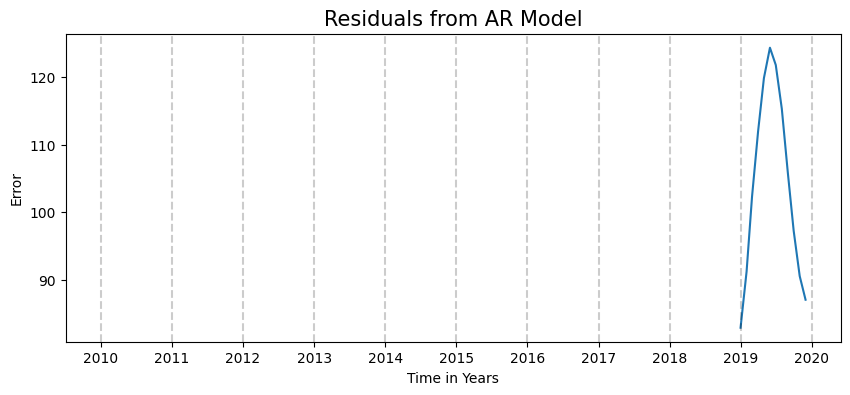

In [68]:
plt.figure(figsize= (10,4))
plt.plot(predictions)
plt.title("Residuals from AR Model", fontsize = 15)
plt.ylabel('Error', fontsize = 10)
plt.xlabel('Time in Years', fontsize = 10)
for year in range(2010,2021):
    plt.axvline(pd.to_datetime(str(year)+ '-01-01'), color = 'k', linestyle='--', alpha=0.2)

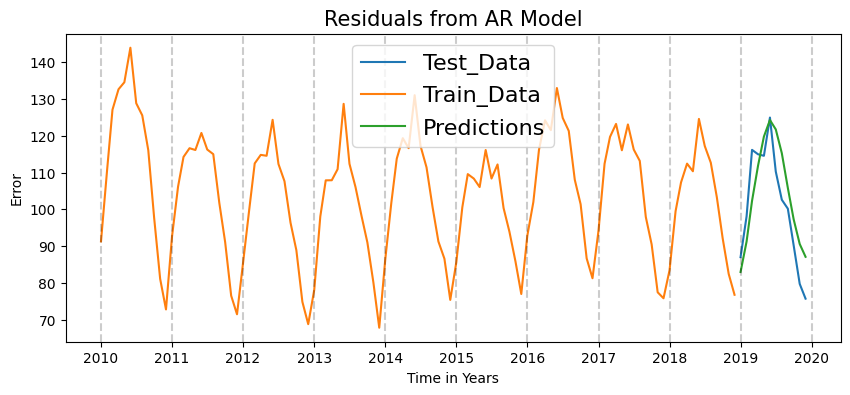

In [69]:
plt.figure(figsize= (10,4))
plt.plot(test_data)
plt.plot(train_data)
plt.plot(predictions)

plt.legend(('Test_Data','Train_Data','Predictions'), fontsize=16)
plt.title("Residuals from AR Model", fontsize = 15)
plt.ylabel('Error', fontsize = 10)
plt.xlabel('Time in Years', fontsize = 10)
for year in range(2010,2021):
    plt.axvline(pd.to_datetime(str(year)+ '-01-01'), color = 'k', linestyle='--', alpha=0.2)

In [70]:
print('Root Mean Squared Error:', np.sqrt(np.mean(residuals**2)))


Root Mean Squared Error: 8.725440368466378


Model has not performed too well with AR MODEL, even with 7 Lag from PACF